In [1]:
from scripts.utils import utils
from scripts.model import OR_model
from scripts.resultData import ResultData

import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import time
import gurobipy as gp
from gurobipy import GRB

In [2]:
def readData(pre=True):
    print("\n\n", "-"*10, "Reading data", "-"*10)
    df = pd.read_csv('dataset.csv')

    print("Data size:", df.shape)

    print("\n\n", "-"*10, "Do precalculations", "-"*10)
    start = time.time()

    utils_ = utils(df, pre=pre)

    print(f"Finish, uses {time.time() - start:.5f} seconds")

    return df, utils_

In [3]:
def getAllowedMoves(df, utils):
    B = df['Block'].unique()
    P_set = set()

    for b1, b2 in itertools.product(B, repeat=2):
        o1 = utils.getRoom(b1)
        o2 = utils.getRoom(b2)
        if abs(o1 - o2) <= 10:
            P_set.add((b1,b2))

    return list(P_set)

In [4]:
def getAllowedMoves2(df, utils):
    B = df['Block'].unique()
    P_set = set()
    
    weekend_days = {6, 7}      
    allowed_weekend_moves = {5, 6, 7}  

    for b1, b2 in itertools.product(B, repeat=2):
        o1 = utils.getRoom(b1)
        o2 = utils.getRoom(b2)
        
        if abs(o1 - o2) > 10:
            continue

        d1 = utils.getDay(b1)
        d2 = utils.getDay(b2)
        
        if (d1 in weekend_days or d2 in weekend_days) and not (d1 in allowed_weekend_moves and d2 in allowed_weekend_moves):
            continue
        
        P_set.add((b1, b2))
    
    return list(P_set)

In [5]:
def getAllowedMoves3(df, utils):
    B = df['Block'].unique()
    P_set = set()
    
    weekend_days = {6, 7}      
    allowed_weekend_moves = {5, 6, 7}  

    for b1, b2 in itertools.product(B, repeat=2):
        o1 = utils.getRoom(b1)
        o2 = utils.getRoom(b2)
        
        if abs(o1 - o2) > 10:
            continue

        d1 = utils.getDay(b1)
        d2 = utils.getDay(b2)
        
        if (d1 in weekend_days or d2 in weekend_days) and not (d1 in allowed_weekend_moves and d2 in allowed_weekend_moves):
            continue
        
        P_set.add((b1, b2))
    
    return list(P_set)

In [6]:
df, utils_ = readData(pre=True)



 ---------- Reading data ----------
Data size: (1456, 7)


 ---------- Do precalculations ----------
Finish, uses 24.33515 seconds


In [7]:
P = getAllowedMoves(df, utils_)

# Hyperparameters
F = ['1']
l_v = [0,0,0,0,0]
u_v = [47,47,47,47,47]

In [8]:
model = OR_model(df=df, P=P, F=F, l_v=l_v, u_v=u_v, alpha=0, utils=utils_)
model.init()
model.optimize()



 ---------- Creating model ----------
Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-24
New model created successfully.


 ---------- Reading sets from df and precompute ----------
Finish, uses 0.00044 seconds


 ---------- Setting decision variables ----------
Finish, uses 0.09215 seconds


 ---------- Setting constraints ----------
Setting additional constraints
Finish, uses 1.47785 seconds
Setting constraints (2)
Finish, uses 1.43846 seconds
Setting constraints (3)
Finish, uses 22.54053 seconds
Setting constraints (4)
Finish, uses 36.06794 seconds
Setting constraints (5)
Finish, uses 69.09379 seconds
---------- Setting objection ----------
Finish, uses 0.00109 seconds


 ---------- Optimizing ----------
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D81)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 3654 rows, 48147 columns and 7

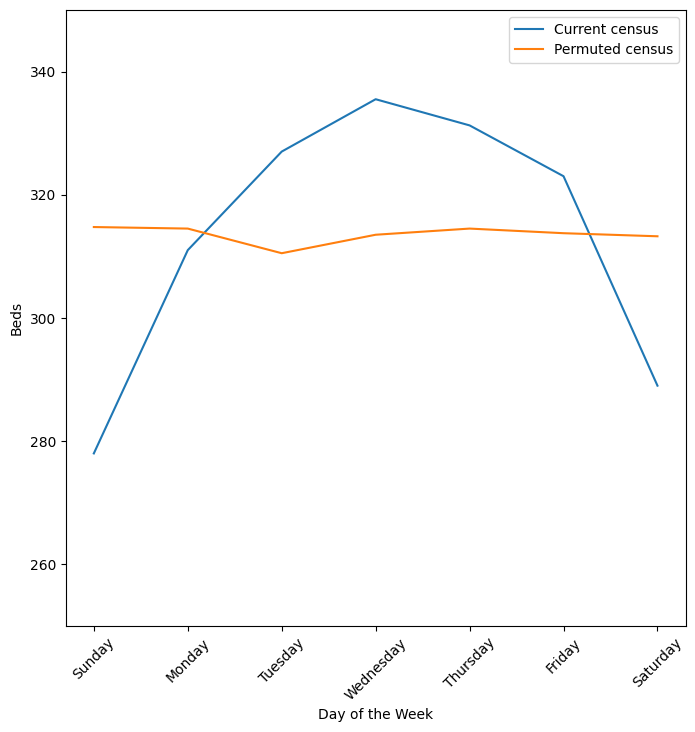

In [9]:
result = model.getResult()
result.plot()

In [10]:
result.save("result_P1_a0.csv")